In [ ]:
#Installing require dependencies.
!pip install numpy
!pip install dataprep
!pip install keras
!pip install tensorflow
!pip install pydot
!pip install ann_visualizer
!pip install graphviz
!pip install -U tensorflow
from keras.src.utils.np_utils import to_categorical
# Install necessary packages
!pip install mne
!pip install scipy
!pip install numpy
!pip install tensorflow
import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:

#import useful library
import os
import pandas as pd
from scipy.io import loadmat
import numpy as np

sessionLabel = [
    [1,2,3,0,2,0,0,1,0,1,2,1,1,1,2,3,2,2,3,3,0,3,0,3],
    [2,1,3,0,0,2,0,2,3,3,2,3,2,0,1,1,2,1,0,3,0,1,3,1],
    [1,2,2,1,3,3,3,1,1,2,1,0,2,3,3,0,2,3,0,0,2,0,1,0]]
labelId="LABEL_ID"
channelNames=['FP1','FPZ','FP2','AF3','AF4','F7','F5','F3','F1','FZ',
                   'F2','F4','F6','F8','FT7','FC5','FC3','FC1','FCZ','FC2',
                   'FC4','FC6','FT8','T7','C5','C3','C1','CZ','C2','C4',
                   'C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6',
                   'TP8','P7','P5','P3','P1','PZ','P2','P4','P6','P8',
                   'PO7','PO5','PO3','POZ','PO4','PO6','PO8','CB1','O1','OZ',
                   'O2','CB2']
sessionNumbers=3
trailNumbers=24
frequencyNumber=5


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#list all the mat file in the system
def getAllFileList(getPath):
  listOfFilePaths=[]
  for file in os.listdir(getPath):
    if(file.endswith('.mat')):
      listOfFilePaths.append(os.sep.join([getPath,file]))
  return listOfFilePaths

#FOR DEBUG PURPOSE ONLY
# print(len(getAllFileList('/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/1')))

Creating csv file


In [ ]:
#creating CSV File for the given subject data and storing them in the system
#csv file prefex
CSV_FILE_NAME="rawData"
# RAW_DATA_FILEPATH='/content/drive/MyDrive/SEED_IV/eeg_raw_data' saadbhai
RAW_DATA_FILEPATH='/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data'
def sessionCsvFileCheck(sessionForFile):
  sessionCsvFile=CSV_FILE_NAME+str(sessionForFile)+".csv"
  if (os.path.exists(sessionCsvFile)==False):#if file doesnot exist then make new file
    df=pd.DataFrame(columns=channelNames+[labelId])
    df.to_csv(sessionCsvFile,index=False,header=True) #if header is true list of str name will be written(str name=channelsName)
  return sessionCsvFile;





def writeRawDataToCsv():
  for session in range(3,sessionNumbers+1):
    csvFilePath=sessionCsvFileCheck(session)
    sessionPathForFile=os.path.join(RAW_DATA_FILEPATH,str(session))
    files=getAllFileList(sessionPathForFile)
    #in above 2 steps we want to get all the data from our eeg dataset and read them to store in csv file
    listForRows=[]
    print(f"###Printing all files in the RAW_DATA_FILE_PATH for             session {session} with total file={len(files)}    ##########",files)
    for file in files:
      loadMatFileWithGivenPath=loadmat(file)
      keysForGivenFile=loadMatFileWithGivenPath.keys()
      #print(keysForGivenFile)#For Debug Purpose to see if key is available
      trailNumber=0
      for trailName in keysForGivenFile:
          #need this number to extract sesssion labels later in this for loop
        #trail name is eeg_1,eeg_2......eeg_24
        if(trailName=="__header__" or trailName=="__version__" or trailName=="__globals__"):
          #i don't want this keys so i pass this scope
          pass
        else:
          print(trailName)
          if(trailNumber==24):trailNumber=0
          trailNumber=trailNumber+1
          loadData=loadMatFileWithGivenPath[trailName]
          lengthOfDataInSingleTrail=len(loadData)
          #there are 62 channel and in each channell there 31k,32k,34k...variable data
          lengthOfDataInEachRowForEachTrail=len(loadData[0])
          print("length of channel(Always 62)",lengthOfDataInSingleTrail,"length of data in each channel",lengthOfDataInEachRowForEachTrail)
          dataRangeWanted=5 #int(lengthOfDataInEachRowForEachTrail/60)
          #now lets write csv file with full details like dictionary key pair "labels(variable)"=
          for row in range(1,dataRangeWanted+1):
            smallValueFromThatROwNumber=min(row*50,lengthOfDataInEachRowForEachTrail-1)
            #let's create empty dictionary to hold those data
            rowForMyCsvFile={}
            for column in range(0,lengthOfDataInSingleTrail):
              #channelNames[column] is data in each trail which has 62 channel data
              rowForMyCsvFile[channelNames[column]]=loadData[column][smallValueFromThatROwNumber]
              rowForMyCsvFile[labelId]=sessionLabel[session-1][trailNumber-1]
              listForRows.append(rowForMyCsvFile)
          print("File data read ending now writing file")
    print("writing datat..........................................................")
    df=pd.DataFrame(listForRows)
    df.to_csv(csvFilePath,mode='a',index=False,header=False)


#for DEBUG PURPOSE ONLY
writeRawDataToCsv()


###Printing all files in the RAW_DATA_FILE_PATH for             session 3 with total file=15    ########## ['/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/2_20151012.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/3_20151101.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/4_20151123.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/5_20160420.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/6_20150512.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/7_20150721.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/8_20151117.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/9_20151209.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/10_20151023.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/11_20151011.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/12_20150807.mat', '/content/drive/MyDrive/SEED DATA/SEED_IV/eeg_raw_data/3/14_20151215.mat', 

In [ ]:
# @title
# ## import useful packages

# from __future__ import print_function
# #from mnist.loader import MNIST
# from tensorflow import keras
# import tensorflow as tf
# from tensorflow.python.keras import layers
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Dropout, Flatten
# from tensorflow.python.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D
# from tensorflow.python.keras import backend as K
# import np_utils
# #from tensorflow.keras.utils import plot_model#,np_utils
# #from tensorflow.keras import optimizers
# from matplotlib import pyplot as plt
# #from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn import model_selection as ms

ModuleNotFoundError: ignored

In [ ]:
#from tensorflow.keras.utils import plot_model#,np_utils
raw_df = pd.read_csv('rawData3.csv')
#print(raw_df['FP1'])

In [ ]:
import random
raw_df[labelId] = raw_df[labelId].apply(lambda x: 0 if x > 4 else random.randrange(0,4))
X_raw = np.expand_dims(raw_df.loc[:,channelNames].astype(float), axis=2)

Y_raw = raw_df.values[:, len(channelNames)]
print(X_raw.shape,Y_raw.shape)

(111600, 62, 1) (111600,)


In [ ]:
print(raw_df)

              FP1  FPZ        FP2        AF3        AF4         F7         F5  \
0       14.454126    1 -16.838312  -8.821487  -3.635883  -8.910894  19.073486   
1       14.454126    1 -16.838312  -8.821487  -3.635883  -8.910894  19.073486   
2       14.454126    1 -16.838312  -8.821487  -3.635883  -8.910894  19.073486   
3       14.454126    1 -16.838312  -8.821487  -3.635883  -8.910894  19.073486   
4       14.454126    1 -16.838312  -8.821487  -3.635883  -8.910894  19.073486   
...           ...  ...        ...        ...        ...        ...        ...   
111595  12.040138    0  -4.589558  22.023916  13.709068 -26.613474  23.007393   
111596  12.040138    0  -4.589558  22.023916  13.709068 -26.613474  23.007393   
111597  12.040138    0  -4.589558  22.023916  13.709068 -26.613474  23.007393   
111598  12.040138    0  -4.589558  22.023916  13.709068 -26.613474  23.007393   
111599  12.040138    0  -4.589558  22.023916  13.709068 -26.613474  23.007393   

               F3         F

In [ ]:
encoder = LabelEncoder()
print(Y_raw.shape)
Y_raw_encoded = encoder.fit_transform(Y_raw)
Y_raw_onehot = to_categorical(Y_raw_encoded)

(111600,)


In [ ]:
from sklearn import model_selection as ms

X_raw_train, X_raw_test, Y_raw_train, Y_raw_test = ms.train_test_split(X_raw, Y_raw_onehot, test_size=0.3, random_state=0)

In [ ]:
# Install necessary packages
!pip install mne
!pip install scipy
!pip install numpy
!pip install tensorflow
import os
import numpy as np
import scipy.io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Assuming X_raw_train, Y_raw_train, X_raw_test, Y_raw_test are properly defined
# Assuming Y_raw_train and Y_raw_test are one-hot encoded

# Reshape labels to class indices
Y_raw_train_class_indices = np.argmax(Y_raw_train, axis=1)
Y_raw_test_class_indices = np.argmax(Y_raw_test, axis=1)

# Create and compile the model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(62, 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Print shapes for debugging purposes
print("Shapes:")
print("X_raw_train:", X_raw_train.shape)
print("Y_raw_train_class_indices:", Y_raw_train_class_indices.shape)
print("X_raw_test:", X_raw_test.shape)
print("Y_raw_test_class_indices:", Y_raw_test_class_indices.shape)

# Fit the model
history = model.fit(X_raw_train, Y_raw_train_class_indices, validation_data=(X_raw_test, Y_raw_test_class_indices), epochs=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 60, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 246532 (963.02 KB)
Trainable params: 246532 (963.02 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Assuming 'model' is your trained model and 'X_raw_test', 'Y_raw_test_class_indices' are your test data
# Also assuming 'Y_raw_test_class_indices' is the ground truth class indices
model.summary()
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_raw_test, Y_raw_test_class_indices)

# Print the loss and accuracy
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 60, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 246532 (963.02 KB)
Trainable params: 246532 (963.02 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# @title
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'model' is your trained model and 'X_raw_test', 'Y_raw_test' are your test data
# Also assuming 'Y_raw_test' is the ground truth one-hot encoded labels

# Get predictions for the test data
predictions = model.predict(X_raw_test)
predicted_class_indices = np.argmax(predictions, axis=1)

# Convert one-hot encoded ground truth to class indices
true_class_indices = np.argmax(Y_raw_test, axis=1)

# Calculate and print accuracy
accuracy = accuracy_score(true_class_indices, predicted_class_indices)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate and print classification report
class_names = ['happy', 'sad', 'fear', 'neutral']
report = classification_report(true_class_indices, predicted_class_indices, target_names=class_names)
print("Classification Report:\n", report)


1047/1047 [==============================] - 4s 3ms/step
Accuracy: 52.94%
Classification Report:
               precision    recall  f1-score   support

       happy       0.53      1.00      0.69     17725
         sad       0.00      0.00      0.00      5266
        fear       0.00      0.00      0.00      5193
     neutral       0.00      0.00      0.00      5296

    accuracy                           0.53     33480
   macro avg       0.13      0.25      0.17     33480
weighted avg       0.28      0.53      0.37     33480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


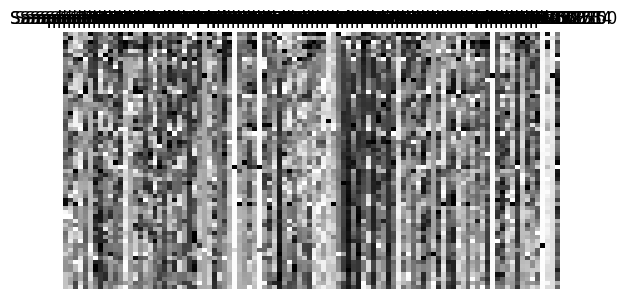

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_raw_train is your input data

# Number of samples to visualize
num_samples_to_visualize = 100

# Randomly select samples
random_indices = np.random.choice(X_raw_train.shape[0], num_samples_to_visualize, replace=False)
selected_samples = X_raw_train[random_indices]

# Plot each selected sample
for i in range(num_samples_to_visualize):
    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(selected_samples[i, :, :], cmap='gray')  # Assuming grayscale images
    plt.title(f"Sample {random_indices[i]}")
    plt.axis('off')

plt.show()

1047/1047 [==============================] - 6s 5ms/step


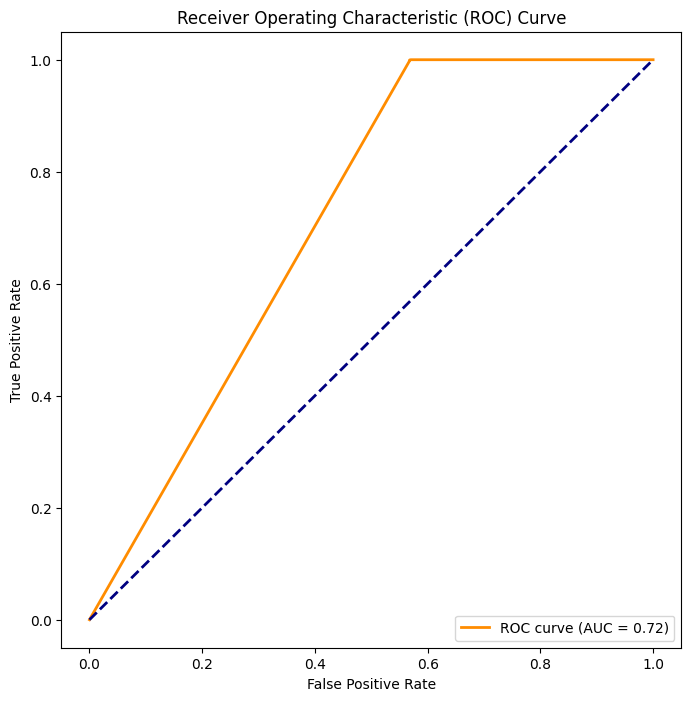

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_prob = model.predict(X_raw_test)
from matplotlib import pyplot as plt

# For binary classification tasks, use the appropriate class index
# Replace this line with your class index or use softmax output for multi-class tasks
y_prob = y_prob[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_raw_test[:, 1], y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()